In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime
from pathlib import Path

In [7]:
DATA = Path("../Data")

In [8]:
train = pd.read_csv(DATA / "fog_train_01.csv")

In [9]:
def create_datetime_minute(data):
    if data["년도"] == 'I' :
        return datetime.datetime(year=2020, month=data['월'], day=data['일'], hour = data["시간"], minute=data["분"])
    elif data["년도"] == 'J' :
        return datetime.datetime(year=2021, month=data['월'], day=data['일'], hour = data["시간"], minute=data["분"])
    else :
        return datetime.datetime(year=2022, month=data['월'], day=data['일'], hour = data["시간"], minute=data["분"])

In [10]:
train["년월일시분"] = train.apply(create_datetime_minute, axis=1)

In [11]:
train["NaN유무"] = train.isna().any(axis=1).astype(int)

In [12]:
train[train["NaN유무"]==1]

,년도,월,일,시간,분,지점번호,10분평균풍향,10분평균풍속,10분평균기온,강수유무,10분평균상대습도,10분일사량합,10분평균지면온도,10분평균시정,시정구간,년월일시분,NaN유무
31,I,1,1,5,20,AA,NaN,NaN,-5.0,0.0,55.6,0.00,-2.2,20000.0,4.0,2020-01-01 05:20:00,1
32,I,1,1,5,30,AA,NaN,NaN,-5.0,0.0,56.2,0.00,-2.2,20000.0,4.0,2020-01-01 05:30:00,1
33,I,1,1,5,40,AA,NaN,NaN,-5.0,0.0,56.5,0.00,-2.1,18219.0,4.0,2020-01-01 05:40:00,1
34,I,1,1,5,50,AA,NaN,NaN,-4.9,0.0,57.3,0.00,-2.1,17846.0,4.0,2020-01-01 05:50:00,1
35,I,1,1,6,0,AA,NaN,NaN,-4.8,0.0,57.5,0.00,-2.1,20000.0,4.0,2020-01-01 06:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3155926,K,12,28,7,10,EC,307.9,4.3,2.0,0.0,62.6,0.00,-1.4,NaN,NaN,2022-12-28 07:10:00,1
3155961,K,12,28,13,0,EC,294.5,6.1,6.7,0.0,41.3,0.32,15.2,NaN,NaN,2022-12-28 13:00:00,1
3156100,K,12,29,12,10,EC,16.3,3.5,4.7,0.0,43.2,0.34,14.6,NaN,NaN,2022-12-29 12:10:00,1
3156135,K,12,29,18,0,EC,314.4,8.8,3.5,0.0,42.0,0.00,1.6,NaN,NaN,2022-12-29 18:00:00,1


In [13]:
train

,년도,월,일,시간,분,지점번호,10분평균풍향,10분평균풍속,10분평균기온,강수유무,10분평균상대습도,10분일사량합,10분평균지면온도,10분평균시정,시정구간,년월일시분,NaN유무
0,I,1,1,0,10,AA,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000.0,4.0,2020-01-01 00:10:00,0
1,I,1,1,0,20,AA,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000.0,4.0,2020-01-01 00:20:00,0
2,I,1,1,0,30,AA,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000.0,4.0,2020-01-01 00:30:00,0
3,I,1,1,0,40,AA,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000.0,4.0,2020-01-01 00:40:00,0
4,I,1,1,0,50,AA,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000.0,4.0,2020-01-01 00:50:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156454,K,12,31,23,10,EC,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,20000.0,4.0,2022-12-31 23:10:00,0
3156455,K,12,31,23,20,EC,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,20000.0,4.0,2022-12-31 23:20:00,0
3156456,K,12,31,23,30,EC,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,20000.0,4.0,2022-12-31 23:30:00,0
3156457,K,12,31,23,40,EC,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,20000.0,4.0,2022-12-31 23:40:00,0


In [14]:
train_AA = train.query("지점번호=='AA'")

In [15]:
train_AA

,년도,월,일,시간,분,지점번호,10분평균풍향,10분평균풍속,10분평균기온,강수유무,10분평균상대습도,10분일사량합,10분평균지면온도,10분평균시정,시정구간,년월일시분,NaN유무
0,I,1,1,0,10,AA,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000.0,4.0,2020-01-01 00:10:00,0
1,I,1,1,0,20,AA,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000.0,4.0,2020-01-01 00:20:00,0
2,I,1,1,0,30,AA,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000.0,4.0,2020-01-01 00:30:00,0
3,I,1,1,0,40,AA,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000.0,4.0,2020-01-01 00:40:00,0
4,I,1,1,0,50,AA,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000.0,4.0,2020-01-01 00:50:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157814,K,12,31,23,10,AA,205.2,1.9,0.0,0.0,76.0,0.0,-1.9,14470.0,4.0,2022-12-31 23:10:00,0
2157815,K,12,31,23,20,AA,197.1,2.0,0.2,0.0,75.9,0.0,-1.8,14990.0,4.0,2022-12-31 23:20:00,0
2157816,K,12,31,23,30,AA,195.8,2.3,0.4,0.0,74.4,0.0,-1.7,16180.0,4.0,2022-12-31 23:30:00,0
2157817,K,12,31,23,40,AA,205.0,2.2,0.7,0.0,74.6,0.0,-1.7,15830.0,4.0,2022-12-31 23:40:00,0


In [16]:
train[train["10분평균시정"].isna()]

,년도,월,일,시간,분,지점번호,10분평균풍향,10분평균풍속,10분평균기온,강수유무,10분평균상대습도,10분일사량합,10분평균지면온도,10분평균시정,시정구간,년월일시분,NaN유무
7645,I,2,23,2,20,AA,272.0,1.3,-0.9,0.0,61.1,0.00,-1.0,NaN,NaN,2020-02-23 02:20:00,1
7780,I,2,24,0,50,AA,140.7,1.2,2.1,0.0,59.5,0.00,0.8,NaN,NaN,2020-02-24 00:50:00,1
16053,I,4,21,11,40,AA,271.7,7.0,9.2,0.0,42.8,0.32,16.7,NaN,NaN,2020-04-21 11:40:00,1
16054,I,4,21,11,50,AA,276.4,6.0,9.3,0.0,43.4,0.26,19.0,NaN,NaN,2020-04-21 11:50:00,1
16055,I,4,21,12,0,AA,268.4,5.9,9.5,0.0,41.7,0.48,21.1,NaN,NaN,2020-04-21 12:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3155926,K,12,28,7,10,EC,307.9,4.3,2.0,0.0,62.6,0.00,-1.4,NaN,NaN,2022-12-28 07:10:00,1
3155961,K,12,28,13,0,EC,294.5,6.1,6.7,0.0,41.3,0.32,15.2,NaN,NaN,2022-12-28 13:00:00,1
3156100,K,12,29,12,10,EC,16.3,3.5,4.7,0.0,43.2,0.34,14.6,NaN,NaN,2022-12-29 12:10:00,1
3156135,K,12,29,18,0,EC,314.4,8.8,3.5,0.0,42.0,0.00,1.6,NaN,NaN,2022-12-29 18:00:00,1


In [17]:
train[train["년월일시분"]=='2020-10-12 00:30:00']

,년도,월,일,시간,분,지점번호,10분평균풍향,10분평균풍속,10분평균기온,강수유무,10분평균상대습도,10분일사량합,10분평균지면온도,10분평균시정,시정구간,년월일시분,NaN유무
41042,I,10,12,0,30,AA,289.2,2.6,15.7,0.0,80.6,0.00,14.2,NaN,NaN,2020-10-12 00:30:00,1
93745,I,10,12,0,30,AB,304.8,0.9,12.0,0.0,95.0,0.00,12.2,9842.0,4.0,2020-10-12 00:30:00,0
146448,I,10,12,0,30,AC,134.7,1.0,13.9,0.0,93.2,0.00,14.4,17872.0,4.0,2020-10-12 00:30:00,0
199151,I,10,12,0,30,AD,318.9,0.9,15.3,0.0,93.3,0.00,15.2,15000.0,4.0,2020-10-12 00:30:00,0
251854,I,10,12,0,30,AE,233.5,0.5,16.1,0.0,86.5,0.00,14.0,6600.0,4.0,2020-10-12 00:30:00,0
304557,I,10,12,0,30,AF,207.1,1.0,16.7,0.0,94.2,0.01,15.4,15303.0,4.0,2020-10-12 00:30:00,0
357260,I,10,12,0,30,AG,37.1,0.7,14.3,0.0,84.0,0.00,13.9,16150.0,4.0,2020-10-12 00:30:00,0
409963,I,10,12,0,30,AH,245.6,0.3,15.8,0.0,88.4,0.00,15.8,6000.0,4.0,2020-10-12 00:30:00,0
462666,I,10,12,0,30,BA,0.0,0.0,11.3,0.0,99.0,0.00,11.8,14566.0,4.0,2020-10-12 00:30:00,0
515369,I,10,12,0,30,BB,323.1,0.3,11.8,0.0,84.8,0.00,10.3,20000.0,4.0,2020-10-12 00:30:00,0


In [18]:
points = train["지점번호"].unique()

In [19]:
points

array(['AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'BA', 'BB', 'BC',
       'BD', 'CA', 'CB', 'DA', 'DB', 'DC', 'EA', 'EB', 'EC'], dtype=object)

## KNN 보간


In [20]:
train.dtypes

년도                   object
월                     int64
일                     int64
시간                    int64
분                     int64
지점번호                 object
10분평균풍향             float64
10분평균풍속             float64
10분평균기온             float64
강수유무                float64
10분평균상대습도           float64
10분일사량합             float64
10분평균지면온도           float64
10분평균시정             float64
시정구간                float64
년월일시분        datetime64[ns]
NaN유무                 int64
dtype: object

In [21]:
train.columns

Index(['년도', '월', '일', '시간', '분', '지점번호', '10분평균풍향', '10분평균풍속', '10분평균기온',
       '강수유무', '10분평균상대습도', '10분일사량합', '10분평균지면온도', '10분평균시정', '시정구간', '년월일시분',
       'NaN유무'],
      dtype='object')

In [22]:
train.select_dtypes(exclude=['object','datetime64']).columns

Index(['월', '일', '시간', '분', '10분평균풍향', '10분평균풍속', '10분평균기온', '강수유무',
       '10분평균상대습도', '10분일사량합', '10분평균지면온도', '10분평균시정', '시정구간', 'NaN유무'],
      dtype='object')

In [23]:
from sklearn.impute import KNNImputer

colunms = ['10분평균풍향', '10분평균풍속', '10분평균기온', '강수유무','10분평균상대습도', 
           '10분일사량합', '10분평균지면온도', '10분평균시정', '시정구간']

impute_data = []
for i, point in enumerate(points):
    select_data = train.query(f"지점번호=='{point}'")

In [24]:
from sklearn.impute import KNNImputer

columns = ['10분평균풍향', '10분평균풍속', '10분평균기온', '강수유무','10분평균상대습도', 
           '10분일사량합', '10분평균지면온도', '10분평균시정']

train_AA_select_col = train_AA[columns]

imputer = KNNImputer(n_neighbors= 6) # 1시간 평균

filled_train = imputer.fit_transform(train_AA_select_col)

filled_train=pd.DataFrame(filled_train, columns=columns)

In [25]:
train_AA[columns].isna().sum()

10분평균풍향       404
10분평균풍속       404
10분평균기온       110
강수유무          716
10분평균상대습도      97
10분일사량합       655
10분평균지면온도    5031
10분평균시정      4799
dtype: int64

In [26]:
filled_train

,10분평균풍향,10분평균풍속,10분평균기온,강수유무,10분평균상대습도,10분일사량합,10분평균지면온도,10분평균시정
0,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000.0
1,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000.0
2,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000.0
3,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000.0
4,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000.0
...,...,...,...,...,...,...,...,...
157818,205.2,1.9,0.0,0.0,76.0,0.0,-1.9,14470.0
157819,197.1,2.0,0.2,0.0,75.9,0.0,-1.8,14990.0
157820,195.8,2.3,0.4,0.0,74.4,0.0,-1.7,16180.0
157821,205.0,2.2,0.7,0.0,74.6,0.0,-1.7,15830.0


In [27]:
store_col = ['년월일시분', '년도', '월', '일', '시간', '분', '지점번호', 'NaN유무', '시정구간']
train_AA_store = train_AA[store_col].reset_index(drop=True)
train_AA_store

,년월일시분,년도,월,일,시간,분,지점번호,NaN유무,시정구간
0,2020-01-01 00:10:00,I,1,1,0,10,AA,0,4.0
1,2020-01-01 00:20:00,I,1,1,0,20,AA,0,4.0
2,2020-01-01 00:30:00,I,1,1,0,30,AA,0,4.0
3,2020-01-01 00:40:00,I,1,1,0,40,AA,0,4.0
4,2020-01-01 00:50:00,I,1,1,0,50,AA,0,4.0
...,...,...,...,...,...,...,...,...,...
157818,2022-12-31 23:10:00,K,12,31,23,10,AA,0,4.0
157819,2022-12-31 23:20:00,K,12,31,23,20,AA,0,4.0
157820,2022-12-31 23:30:00,K,12,31,23,30,AA,0,4.0
157821,2022-12-31 23:40:00,K,12,31,23,40,AA,0,4.0


In [28]:
train_AA_imputed = pd.concat([train_AA_store, filled_train], axis=1, join='outer')
train_AA_imputed

,년월일시분,년도,월,일,시간,분,지점번호,NaN유무,시정구간,10분평균풍향,10분평균풍속,10분평균기온,강수유무,10분평균상대습도,10분일사량합,10분평균지면온도,10분평균시정
0,2020-01-01 00:10:00,I,1,1,0,10,AA,0,4.0,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000.0
1,2020-01-01 00:20:00,I,1,1,0,20,AA,0,4.0,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000.0
2,2020-01-01 00:30:00,I,1,1,0,30,AA,0,4.0,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000.0
3,2020-01-01 00:40:00,I,1,1,0,40,AA,0,4.0,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000.0
4,2020-01-01 00:50:00,I,1,1,0,50,AA,0,4.0,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157818,2022-12-31 23:10:00,K,12,31,23,10,AA,0,4.0,205.2,1.9,0.0,0.0,76.0,0.0,-1.9,14470.0
157819,2022-12-31 23:20:00,K,12,31,23,20,AA,0,4.0,197.1,2.0,0.2,0.0,75.9,0.0,-1.8,14990.0
157820,2022-12-31 23:30:00,K,12,31,23,30,AA,0,4.0,195.8,2.3,0.4,0.0,74.4,0.0,-1.7,16180.0
157821,2022-12-31 23:40:00,K,12,31,23,40,AA,0,4.0,205.0,2.2,0.7,0.0,74.6,0.0,-1.7,15830.0


In [29]:
def make_class(vis):
    if 0 < vis and vis < 200 :
        return 1
    elif 200 <= vis and vis < 500 :
        return 2
    elif 500 <= vis and vis < 1000 :
        return 3
    elif 1000 <= vis :
        return 4
    else :
        return np.nan

In [30]:
train_AA_imputed["시정구간"] = train_AA_imputed["10분평균시정"].apply(make_class)

In [31]:
train_AA_imputed

,년월일시분,년도,월,일,시간,분,지점번호,NaN유무,시정구간,10분평균풍향,10분평균풍속,10분평균기온,강수유무,10분평균상대습도,10분일사량합,10분평균지면온도,10분평균시정
0,2020-01-01 00:10:00,I,1,1,0,10,AA,0,4,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000.0
1,2020-01-01 00:20:00,I,1,1,0,20,AA,0,4,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000.0
2,2020-01-01 00:30:00,I,1,1,0,30,AA,0,4,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000.0
3,2020-01-01 00:40:00,I,1,1,0,40,AA,0,4,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000.0
4,2020-01-01 00:50:00,I,1,1,0,50,AA,0,4,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157818,2022-12-31 23:10:00,K,12,31,23,10,AA,0,4,205.2,1.9,0.0,0.0,76.0,0.0,-1.9,14470.0
157819,2022-12-31 23:20:00,K,12,31,23,20,AA,0,4,197.1,2.0,0.2,0.0,75.9,0.0,-1.8,14990.0
157820,2022-12-31 23:30:00,K,12,31,23,30,AA,0,4,195.8,2.3,0.4,0.0,74.4,0.0,-1.7,16180.0
157821,2022-12-31 23:40:00,K,12,31,23,40,AA,0,4,205.0,2.2,0.7,0.0,74.6,0.0,-1.7,15830.0


In [32]:
train_AA_seasonal = train_AA_imputed.set_index("년월일시분", drop=True)["10분평균시정"]

In [33]:
train_AA_seasonal

년월일시분
2020-01-01 00:10:00    20000.0
2020-01-01 00:20:00    20000.0
2020-01-01 00:30:00    20000.0
2020-01-01 00:40:00    20000.0
2020-01-01 00:50:00    20000.0
                        ...   
2022-12-31 23:10:00    14470.0
2022-12-31 23:20:00    14990.0
2022-12-31 23:30:00    16180.0
2022-12-31 23:40:00    15830.0
2022-12-31 23:50:00    15580.0
Name: 10분평균시정, Length: 157823, dtype: float64

<Axes: xlabel='None', ylabel='10분평균시정'>

/opt/homebrew/anaconda3/envs/anomaly/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/anomaly/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/anomaly/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/anomaly/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/anomaly/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/e

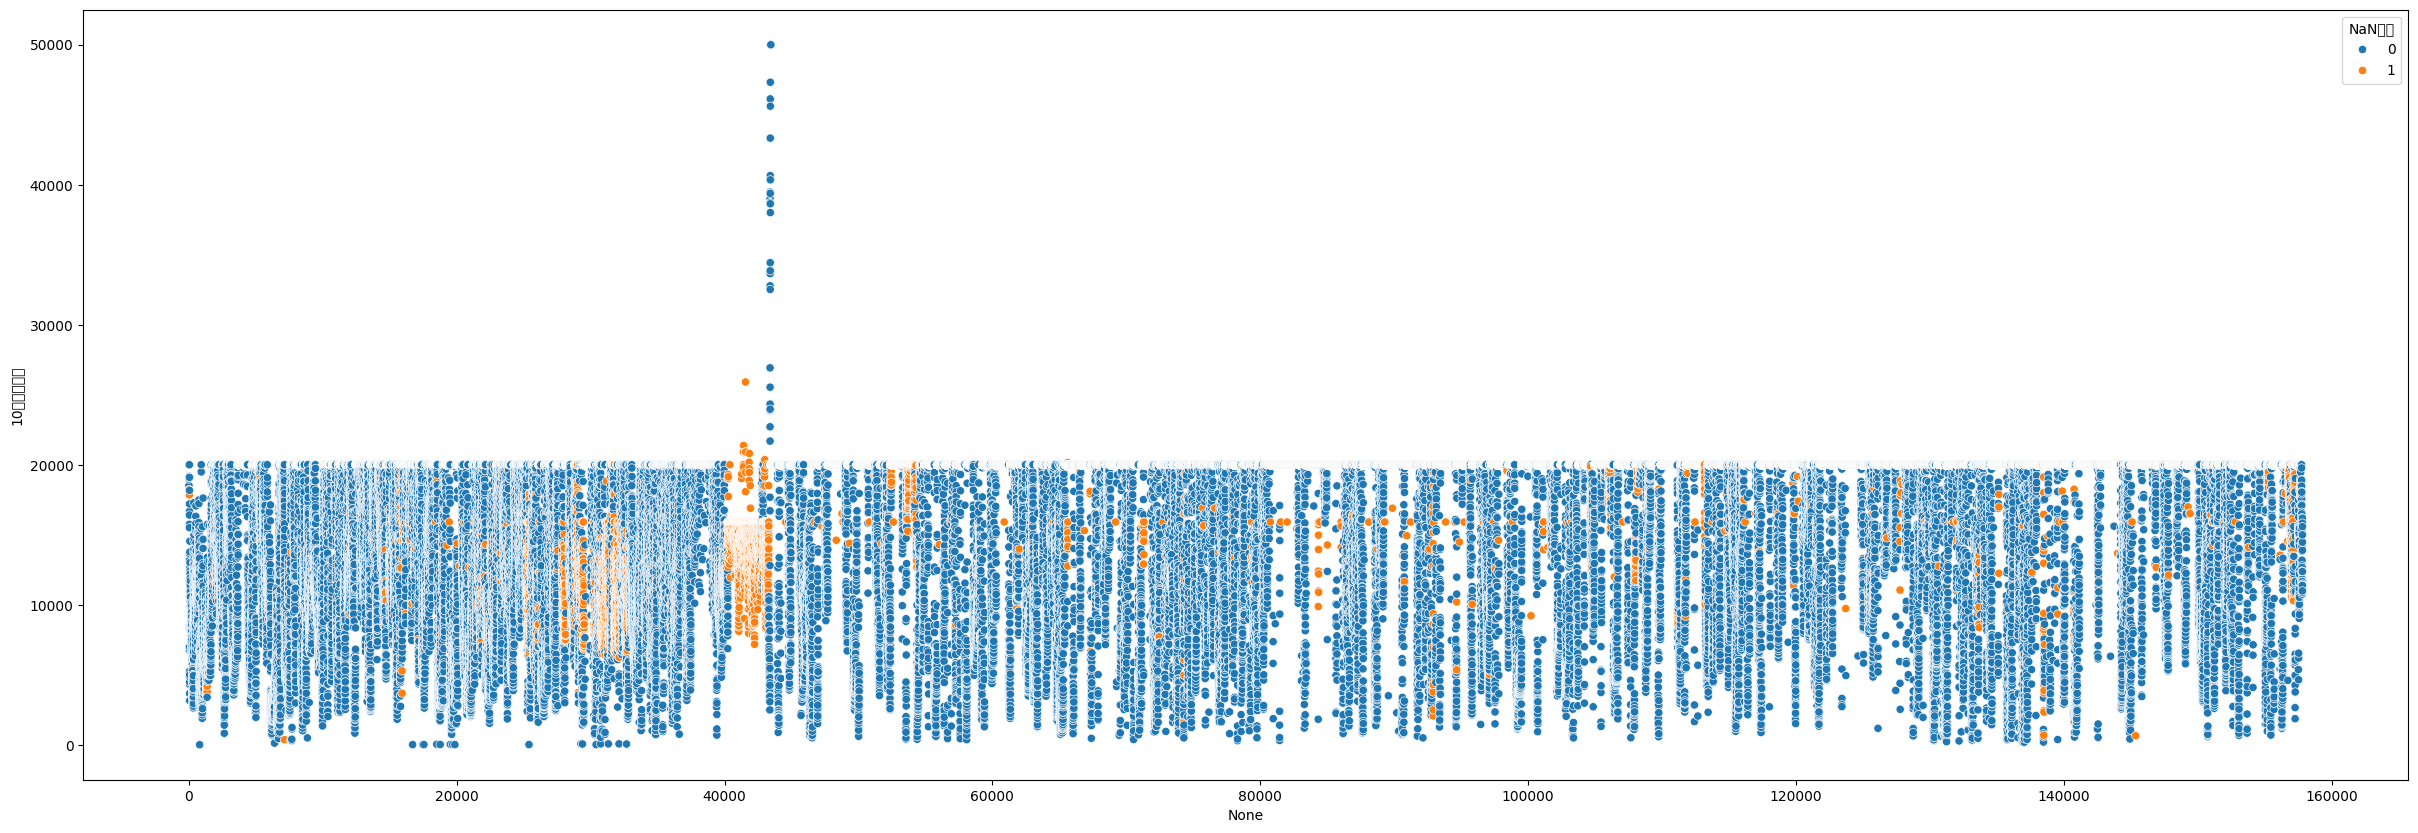

In [34]:
plt.figure(figsize=(30, 10))
sns.scatterplot(train_AA_imputed, x=train_AA_imputed.index, y="10분평균시정", hue="NaN유무")

In [35]:
train_AA_seasonal_crop = train_AA_seasonal

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 년 단위, 월 단위, 일 단위 주기성(잔차가 조금 존재함)이 존재하는 것을 확인

result = seasonal_decompose(train_AA_seasonal[:288], model='addictive', period=6 * 24) # 일 별로 확인했을 시 주기가 발생

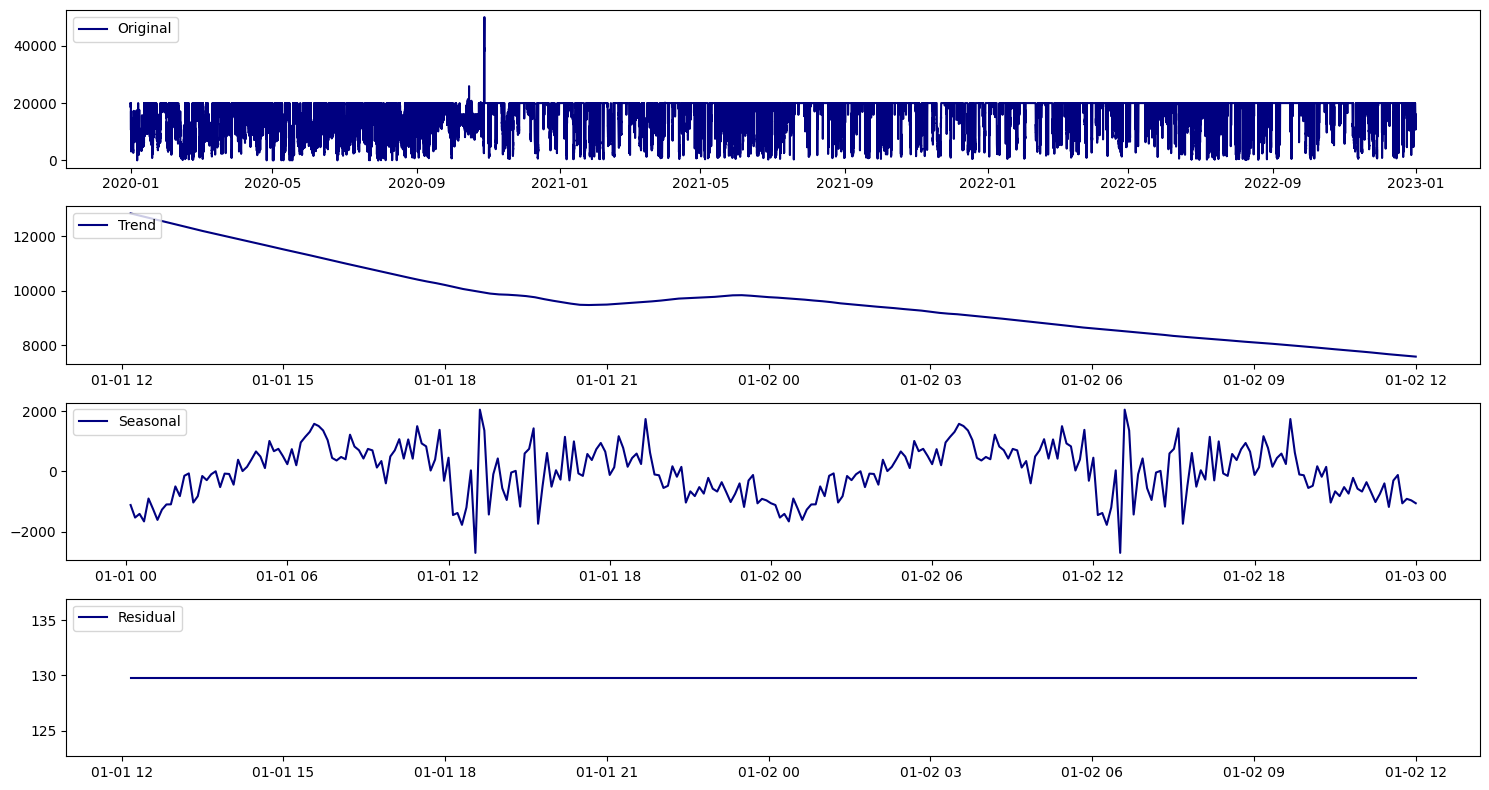

In [37]:
plt.figure(figsize=(15, 8))

plt.subplot(4, 1, 1)
plt.plot(train_AA_seasonal, label="Original", color="navy")
plt.legend(loc='upper left', fontsize=10)

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='navy')
plt.legend(loc='upper left', fontsize=10)

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal', color='navy')
plt.legend(loc='upper left', fontsize=10)

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual', color='navy')
plt.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()